# Import all the libraries needed

In [1]:
#Import all the necessary libraries 
from sklearn import metrics 
import pandas as pd
import numpy as np
import math
import category_encoders as ce
#Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification  
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from kmodes.kmodes import KModes
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
from tensorflow import keras
from tensorflow.keras import layers
#plotting
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
import warnings
warnings.filterwarnings('ignore')

2022-07-01 13:28:48.736760: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-01 13:28:48.736785: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Read the dataset 

In [2]:

data = pd.read_excel("MMSE.xlsx")
MMSE_results={} #hold our accuracy results
GDS_results={}

## Feature Engineering
Since most data has been already cleared and transformed accordingly, we're going to focus on the importance/utility of our features

In [3]:
demographic_features = ["AGE","GENDER.1","NEGERI.1","Pekerjaan Utama.1","Job Sector Previously.3","Marital Status.1","Tinggal ","Jika Kurang 1 Tahun Berapa Batang.1"]
demographic_features_numerical = ["AGE","Gender Raw","Negeri Raw","Pekerjaan Utama.1","Job Sector Previously.1","Marital Status Raw","Tinggal Raw","Jika Kurang 1 Tahun Berapa Batang.1"]
demographic_categorical = ["GENDER.1","NEGERI.1","Job Sector Previously.3","Marital Status.1","Pekerjaan Utama.1","Tinggal "]

health_features = ["Smoking.1","Minum Alkohol.1","Rokok Sehari.1","Bekas Perokok - Tahun Berhenti.1","ADL.3","WHODAS_baseline.1"]
health_features_numerical = ["Smoking Raw","ukmb1_6","Rokok Sehari Raw","Bekas Perokok - Tahun Berhenti.1","ADL.2","WHODAS_baseline"]
health_categorical = ["Smoking.1","Minum Alkohol.1","ADL.3","WHODAS_baseline.1"]

social_features = ["sumLubben.2","Average Total Neighbourhood.2","Neighbourhood - General Feel.3",
"Total Monthly main income (Full)","Total Monthly side_income.1","Total Social Cohesion Scale .3",
"Medical Outcome Study Social Factor 1(Informational).1","Total Medical Outcome Study Social Factor (Tangible Support).1",
"Total Medical Outcome Study Social Factor (Affective Support).1","Total Medical Outcome Study Social Factor (Positive Social Interaction).1"]
social_features_numerical = ["sumLubben.1","Average Total Neighbourhood.1","Neighbourhood - General Feel.2",
"Total Monthly main income (Full)","Total Monthly side_income.1","Total Social Cohesion Scale (ROUND Value)",
"Medical Outcome Study Social Factor 1(Informational).1","Medical Outcome Study Social Factor 12(Tangible Support)",
"Medical Outcome Study Social Factor (Affective Support)","Total Medical Outcome Study Social Factor 19(Positive Social Interaction)"]
data[social_features_numerical] = data[social_features_numerical].fillna(0) 
social_categorical = ["sumLubben.2","Average Total Neighbourhood.2","Total Social Cohesion Scale .3",
"Medical Outcome Study Social Factor 1(Informational).2","Total Medical Outcome Study Social Factor (Tangible Support).1",
"Total Medical Outcome Study Social Factor (Affective Support).1","Total Medical Outcome Study Social Factor (Positive Social Interaction).1"]

psychology_features = ["Quality Of Life.2","Total SWLS.3","Total_EpQ(Data_Full)(Average).1","Total_Loneliness ",
"Perceived Stress Scale 1 (Unable to control)",
"Perceived Stress Scale 2 (Ability to handle your personal problems)","Perceived Stress Scale 3 (things were going your way)",
"Perceived Stress Scale 4 (not overcome them)",
"Flourushing Scale : I lead a purposeful and meaningful life..3","Flourushing Scale 2: My social relationships are supportive and rewarding..3",
"Flourushing Scale 3: I am engaged and interested in my daily activities..4","Flourushing Scale 4: I actively contribute to the happiness and well-being of others..4",
"Flourushing Scale 5 : I am competent and capable in the activities that are important to me.4","Flourushing Scale 6 :  I am a good person and live a good life.4",
"Flourushing Scale 7 : I am optimistic about my future.4","Flourushing Scale 8: People respect me.4",]
psychology_features_numerical = ["Quality Of Life.2","Total SWLS.2","Total_EpQ(Data_Full)(Average)","Total_Loneliness",
"Perceived Stress Scale 1 (Unable to control)",
"Perceived Stress Scale 2 (Ability to handle your personal problems)","Perceived Stress Scale 3 (things were going your way)",
"Perceived Stress Scale 4 (not overcome them)",
"Flourushing Scale : I lead a purposeful and meaningful life..3","Flourushing Scale 2: My social relationships are supportive and rewarding..3",
"Flourushing Scale 3: I am engaged and interested in my daily activities..4","Flourushing Scale 4: I actively contribute to the happiness and well-being of others..4",
"Flourushing Scale 5 : I am competent and capable in the activities that are important to me.4","Flourushing Scale 6 :  I am a good person and live a good life.4",
"Flourushing Scale 7 : I am optimistic about my future.4","Flourushing Scale 8: People respect me.4"]
psychology_categorical = ["Quality Of Life.2","Total SWLS.3","Total_EpQ(Data_Full)(Average).1","Total_Loneliness"
                          ]
features = demographic_features + health_features + social_features + psychology_features
features_numerical = demographic_features_numerical + health_features_numerical + social_features_numerical + psychology_features_numerical
MMSE = data["MMSE"]
GDS = data["GDS-15"]

Let's start by changing our dataset a little bit

In [4]:
dd = data[demographic_categorical]
dh = data[health_categorical]
ds = data[social_categorical]
dp = data[psychology_categorical]

#Let's see the unique values of our features
for col in dd:
    print(dd[col].unique())
for col in dh:
    print(dh[col].unique())
for col in ds:
    print(ds[col].unique())
for col in dp:
    print(dp[col].unique())
    
#Obviously there's some dirt to be cleaned
dd["GENDER.1"] = dd["GENDER.1"].replace(['#NULL!'],'Perempuan')
dd["Marital Status.1"] = dd["Marital Status.1"].replace('#NULL!','Bujang')
dd["NEGERI.1"] = dd["NEGERI.1"].replace('#NULL!','Johor')
dd["Tinggal "] = dd["Tinggal "].replace('#NULL!','Sendirian')
dh["Smoking.1"] = dh["Smoking.1"].replace(['#NULL!'],'Merokok')   

['Perempuan' 'Lelaki' '#NULL!']
['Johor' 'Perak' 'Kelantan' 'Selangor' '#NULL!']
['NGO' 'Self' 'Public Sector' 'Private Sector']
['Balu/Duda' 'Berkahwin' 'Bujang' 'Bercerai' '#NULL!']
['Bersama Orang Lain' 'Sendirian' '#NULL!']
['Tidak Merokok' 'Bekas Perokok' 'Merokok' '#NULL!']
['Tidak' 'Ya']
['High - Patient independent' 'Low - Patient very dependent']
['Moderate' 'None' 'Some' 'Serious' 'Very serious' 'Not Relevant']
['Less Social Engagement' 'More Social Engagement']
['Somewhat Satisfied' 'Somewhat dissatisfied' 'Very Satisfied']
['Neither agree nor disagree' 'Disagree' False 'Strongly Agree'
 'Strongly disagree']
['Most of the Time' 'Some of the time' 'All of the time'
 'None of the time']
['None of the time' 'Most of the Time' 'All of the time'
 'Some of the time']
['Most of the Time' 'Some of the time' 'All of the time'
 'None of the time']
['Most of the Time' 'All of the time' 'Some of the time'
 'None of the time']
[2. 1. 4. 3.]
['Neutral' 'Agree' 'Disagree']
['No' 'Yes']
[3.

In [5]:
totalFS = data["Flourushing Scale : I lead a purposeful and meaningful life..3"] + data["Flourushing Scale 2: My social relationships are supportive and rewarding..3"] + data["Flourushing Scale 3: I am engaged and interested in my daily activities..4"]+data["Flourushing Scale 4: I actively contribute to the happiness and well-being of others..4"]+data["Flourushing Scale 5 : I am competent and capable in the activities that are important to me.4"]+data["Flourushing Scale 6 :  I am a good person and live a good life.4"]+data["Flourushing Scale 7 : I am optimistic about my future.4"]+data["Flourushing Scale 8: People respect me.4"]
avgFS = totalFS/8.0
data["Flourushing scale"]=avgFS

totalPSS = data["Perceived Stress Scale 1 (Unable to control)"]+data["Perceived Stress Scale 2 (Ability to handle your personal problems)"]+data["Perceived Stress Scale 3 (things were going your way)"]+data["Perceived Stress Scale 4 (not overcome them)"]
avgPSS = totalPSS/4
data["Perceived Stress Scale"] = avgPSS

totalMOSSF=data[social_features_numerical[6]]+data[social_features_numerical[7]]+data[social_features_numerical[8]]+data[social_features_numerical[9]]
avgMOSSF = totalMOSSF/4
data["Medical Outcome Study Social Factor"]=avgMOSSF

data["Total Income"] = data["Total Monthly main income (Full)"]+data["Total Monthly side_income.1"]

#Modify the feature list
psychology_features_numerical=["Quality Of Life.2","Total SWLS.2","Total_EpQ(Data_Full)(Average)","Total_Loneliness","Flourushing scale","Perceived Stress Scale"]
social_features_numerical.remove("Total Monthly main income (Full)")
social_features_numerical.remove("Total Monthly side_income.1")
social_features_numerical.append("Total Income")
social_features_numerical.remove("Medical Outcome Study Social Factor 1(Informational).1")
social_features_numerical.remove("Medical Outcome Study Social Factor 12(Tangible Support)")
social_features_numerical.remove("Medical Outcome Study Social Factor (Affective Support)")
social_features_numerical.remove("Total Medical Outcome Study Social Factor 19(Positive Social Interaction)")
social_features_numerical.append("Medical Outcome Study Social Factor")


In [6]:
final_demographic = pd.get_dummies(dd)
final_health = pd.get_dummies(dh)
final_social = pd.get_dummies(ds)
final_psychology = pd.get_dummies(dp)

final_demographic["AGE"] = data["AGE"]
final_social["Total Income"] = data["Total Income"]
final_psychology["Flourushing scale"] = data["Flourushing scale"]

final_df = pd.concat([final_demographic,final_health,final_social,final_psychology],axis=1)
data[demographic_features_numerical]


,AGE,Gender Raw,Negeri Raw,Pekerjaan Utama.1,Job Sector Previously.1,Marital Status Raw,Tinggal Raw,Jika Kurang 1 Tahun Berapa Batang.1
0,63.0,2.0,1.0,5.0,0.0,4.0,2.0,0.0
1,73.0,2.0,1.0,5.0,0.0,4.0,2.0,0.0
2,69.0,2.0,1.0,5.0,0.0,4.0,1.0,0.0
3,63.0,1.0,1.0,5.0,0.0,2.0,2.0,0.0
4,75.0,2.0,1.0,5.0,0.0,4.0,2.0,0.0
...,...,...,...,...,...,...,...,...
2271,60.0,1.0,4.0,5.0,0.0,2.0,2.0,0.0
2272,65.0,2.0,4.0,5.0,0.0,2.0,2.0,0.0
2273,77.0,1.0,4.0,9.0,3.0,2.0,2.0,0.0
2274,60.0,1.0,4.0,9.0,3.0,2.0,2.0,0.0


## Statistical tests
Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

If an attribute scores <1, then it won't be considered in further steps

In [7]:
#let's test out demographic ds
X = final_demographic.copy()
y = MMSE
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(8,'Score'))  #print 10 best features


                                    Specs       Score
16                                    AGE  139.991270
10             Marital Status.1_Balu/Duda   93.587088
3                       NEGERI.1_Kelantan   66.283089
0                         GENDER.1_Lelaki   47.960955
1                      GENDER.1_Perempuan   44.078787
5                       NEGERI.1_Selangor   43.984155
8   Job Sector Previously.3_Public Sector   42.627027
12             Marital Status.1_Berkahwin   38.491459


In [8]:
X = final_health.copy()
y = MMSE
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                                 Specs      Score
8               WHODAS_baseline.1_None  33.116489
11              WHODAS_baseline.1_Some  29.020158
4                   Minum Alkohol.1_Ya  12.183185
7           WHODAS_baseline.1_Moderate  11.631021
0              Smoking.1_Bekas Perokok   7.856618
10           WHODAS_baseline.1_Serious   3.960730
6   ADL.3_Low - Patient very dependent   2.543103
2              Smoking.1_Tidak Merokok   1.103448
9       WHODAS_baseline.1_Not Relevant   0.872906
12      WHODAS_baseline.1_Very serious   0.742355


In [9]:
final_health.drop("WHODAS_baseline.1_Very serious",axis=1)
final_health.drop("WHODAS_baseline.1_Not Relevant",axis=1)

,Smoking.1_Bekas Perokok,Smoking.1_Merokok,Smoking.1_Tidak Merokok,Minum Alkohol.1_Tidak,Minum Alkohol.1_Ya,ADL.3_High - Patient independent,ADL.3_Low - Patient very dependent,WHODAS_baseline.1_Moderate,WHODAS_baseline.1_None,WHODAS_baseline.1_Serious,WHODAS_baseline.1_Some,WHODAS_baseline.1_Very serious
0,0,0,1,1,0,1,0,1,0,0,0,0
1,0,0,1,1,0,1,0,0,1,0,0,0
2,0,0,1,1,0,1,0,0,1,0,0,0
3,0,0,1,1,0,1,0,0,1,0,0,0
4,0,0,1,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2271,0,0,1,1,0,1,0,0,1,0,0,0
2272,1,0,0,1,0,1,0,0,0,1,0,0
2273,0,1,0,1,0,1,0,0,1,0,0,0
2274,0,1,0,1,0,1,0,0,0,0,1,0


In [10]:
X = final_social.copy()
y = MMSE
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(8,'Score'))  #print 10 best features

                                                Specs         Score
26                                       Total Income  43976.158992
16  Total Medical Outcome Study Social Factor (Tan...      7.505888
4        Average Total Neighbourhood.2_Very Satisfied      7.197781
1                  sumLubben.2_More Social Engagement      6.871168
10  Medical Outcome Study Social Factor 1(Informat...      6.774200
14  Total Medical Outcome Study Social Factor (Tan...      6.772753
18  Total Medical Outcome Study Social Factor (Aff...      6.177984
12  Medical Outcome Study Social Factor 1(Informat...      5.549443


In [11]:
X = final_psychology.copy()
y = GDS
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 10 best features

                                 Specs      Score
6  Total_EpQ(Data_Full)(Average).1_Yes  21.426018
7                    Flourushing scale   4.052334
2                   Total SWLS.3_Agree   3.515889
5   Total_EpQ(Data_Full)(Average).1_No   2.993420
1                     Total_Loneliness   2.721993
4                 Total SWLS.3_Neutral   2.703242
0                    Quality Of Life.2   2.439621
3                Total SWLS.3_Disagree   2.187696


### K-modes as Clustering Algorithm for Categorical Data Type

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 353, cost: 22795.0
Run 1, iteration: 2/100, moves: 46, cost: 22795.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 265, cost: 22795.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 409, cost: 23202.0
Run 3, iteration: 2/100, moves: 242, cost: 23059.0
Run 3, iteration: 3/100, moves: 18, cost: 23059.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 534, cost: 22789.0
Run 4, iteration: 2/100, moves: 125, cost: 22789.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 498, cost: 23059.0
Run 5, iteration: 2/100, moves: 45, cost: 23059.0
Best run was number 4
Init: initializing centroids
Init: initializing clusters
Starting itera

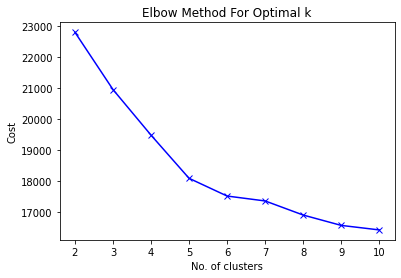

In [12]:
# Elbow curve to find optimal K
cost = []
df = final_df
df["MMSE"]=MMSE
K = range(2,11)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)
print(cost)
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [13]:
#Check the cluster number 5 according to the previous graph
kmode = KModes(n_clusters=5, init = "random", n_init = 2 , verbose=1)
clusters = kmode.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 852, cost: 18346.0
Run 1, iteration: 2/100, moves: 403, cost: 17976.0
Run 1, iteration: 3/100, moves: 17, cost: 17976.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 643, cost: 21398.0
Run 2, iteration: 2/100, moves: 158, cost: 21243.0
Run 2, iteration: 3/100, moves: 123, cost: 21014.0
Run 2, iteration: 4/100, moves: 143, cost: 21014.0
Best run was number 1


In [14]:
# Add the cluster to the dataframe
df['Cluster Labels'] = kmode.labels_
df['Segment'] = df['Cluster Labels'].map({0:'First', 1:'Second',2:'Third',3:'Fourth',4:'Fifth'})
# Order the cluster
df['Segment'] = df['Segment'].astype('category')
df['Segment'] = df['Segment'].cat.reorder_categories(['First', 'Second','Third','Fourth','Fifth'])
# Columns for centroids
list_col = ['Cluster Labels', 'Segment']
cols = [col for col in df if col not in list_col]
# Create an index for cluster interpretation
index = ['First Cluster', 'Second Cluster','Third Cluster','Fourth Cluster','Fifth Cluster']
# Create the data frame
pd.DataFrame(kmode.cluster_centroids_, columns = cols, index = index)

,GENDER.1_Lelaki,GENDER.1_Perempuan,NEGERI.1_Johor,NEGERI.1_Kelantan,NEGERI.1_Perak,NEGERI.1_Selangor,Job Sector Previously.3_NGO,Job Sector Previously.3_Private Sector,Job Sector Previously.3_Public Sector,Job Sector Previously.3_Self,...,Total Income,Quality Of Life.2,Total_Loneliness,Total SWLS.3_Agree,Total SWLS.3_Disagree,Total SWLS.3_Neutral,Total_EpQ(Data_Full)(Average).1_No,Total_EpQ(Data_Full)(Average).1_Yes,Flourushing scale,MMSE
First Cluster,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,796.0,2.0,3.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0
Second Cluster,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,796.0,2.0,3.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0
Third Cluster,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,300.0,2.0,3.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0
Fourth Cluster,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1000.0,1.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
Fifth Cluster,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,300.0,2.0,3.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0


# Models
### Decision tree model 
Test the model on 30 70 distribution:
*Demographic vs MMSE
*health vs MMSE
*social vs MMSE
*Demo + health vs MMSe
...
*Demo + health + Social vs MMSE

*Psy vs GDS

In [15]:
# Import the model you want to use
from sklearn.tree import DecisionTreeClassifier
#Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 6,random_state = 0)

def partition_DT(portion,features,target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=portion, random_state=1)
    #Train the model on the data
    clf.fit(X_train, y_train)
    # Predict labels of unseen (test) data
    y_pred = clf.predict(X_test)
    print("Accuracy of DecisionTree:",metrics.accuracy_score(y_test, y_pred))
    return metrics.accuracy_score(y_test, y_pred)


print("\nMeasuring prediction on MMSE")
MMSE_results["Decision Tree"]=[
    partition_DT(0.2,final_demographic,MMSE)
    ,partition_DT(0.2,final_health,MMSE)
    ,partition_DT(0.2,final_social,MMSE)
    ,partition_DT(0.2,final_psychology,MMSE)
    ,partition_DT(0.2,pd.concat([final_demographic,final_health],axis=1),MMSE)
    ,partition_DT(0.2,pd.concat([final_demographic,final_social],axis=1),MMSE)
    ,partition_DT(0.2,pd.concat([final_social,final_health],axis=1),MMSE)
    ,partition_DT(0.2,pd.concat([final_social,final_psychology],axis=1),MMSE)
    ,partition_DT(0.2,pd.concat([final_health,final_psychology],axis=1),MMSE)
    ,partition_DT(0.2,pd.concat([final_demographic,final_psychology],axis=1),MMSE)
    ,partition_DT(0.2,pd.concat([final_demographic,final_health,final_social],axis=1),MMSE)
    ,partition_DT(0.2,pd.concat([final_demographic,final_health,final_social,final_psychology],axis=1),MMSE)
]
print("\nMeasuring prediction on GDS")
GDS_results["Mlp"]=[    
     partition_DT(0.2,final_demographic,GDS)
    ,partition_DT(0.2,final_health,GDS)
    ,partition_DT(0.2,final_social,GDS)
    ,partition_DT(0.2,final_psychology,GDS)
    ,partition_DT(0.2,pd.concat([final_demographic,final_health],axis=1),GDS)
    ,partition_DT(0.2,pd.concat([final_demographic,final_social],axis=1),GDS)
    ,partition_DT(0.2,pd.concat([final_social,final_health],axis=1),GDS)
    ,partition_DT(0.2,pd.concat([final_social,final_psychology],axis=1),GDS)
    ,partition_DT(0.2,pd.concat([final_health,final_psychology],axis=1),GDS)
    ,partition_DT(0.2,pd.concat([final_demographic,final_psychology],axis=1),GDS)
    ,partition_DT(0.2,pd.concat([final_demographic,final_health,final_social],axis=1),GDS)
    ,partition_DT(0.2,pd.concat([final_demographic,final_health,final_psychology],axis=1),GDS)
    ,partition_DT(0.2,pd.concat([final_demographic,final_psychology,final_social],axis=1),GDS)
    ,partition_DT(0.2,pd.concat([final_psychology,final_health,final_social],axis=1),GDS)
    ,partition_DT(0.2,pd.concat([final_demographic,final_health,final_social,final_psychology],axis=1),GDS)
]




Measuring prediction on MMSE
Accuracy of DecisionTree: 0.6842105263157895
Accuracy of DecisionTree: 0.6381578947368421
Accuracy of DecisionTree: 0.6381578947368421
Accuracy of DecisionTree: 0.6052631578947368
Accuracy of DecisionTree: 0.6600877192982456
Accuracy of DecisionTree: 0.6864035087719298
Accuracy of DecisionTree: 0.6359649122807017
Accuracy of DecisionTree: 0.6381578947368421
Accuracy of DecisionTree: 0.6271929824561403
Accuracy of DecisionTree: 0.6732456140350878
Accuracy of DecisionTree: 0.668859649122807
Accuracy of DecisionTree: 0.6666666666666666

Measuring prediction on GDS
Accuracy of DecisionTree: 0.918859649122807
Accuracy of DecisionTree: 0.918859649122807
Accuracy of DecisionTree: 0.9078947368421053
Accuracy of DecisionTree: 0.9144736842105263
Accuracy of DecisionTree: 0.9078947368421053
Accuracy of DecisionTree: 0.9166666666666666
Accuracy of DecisionTree: 0.9035087719298246
Accuracy of DecisionTree: 0.9122807017543859
Accuracy of DecisionTree: 0.9122807017543859

Let's visualize the decision tree of predicting GDS based on psychology features

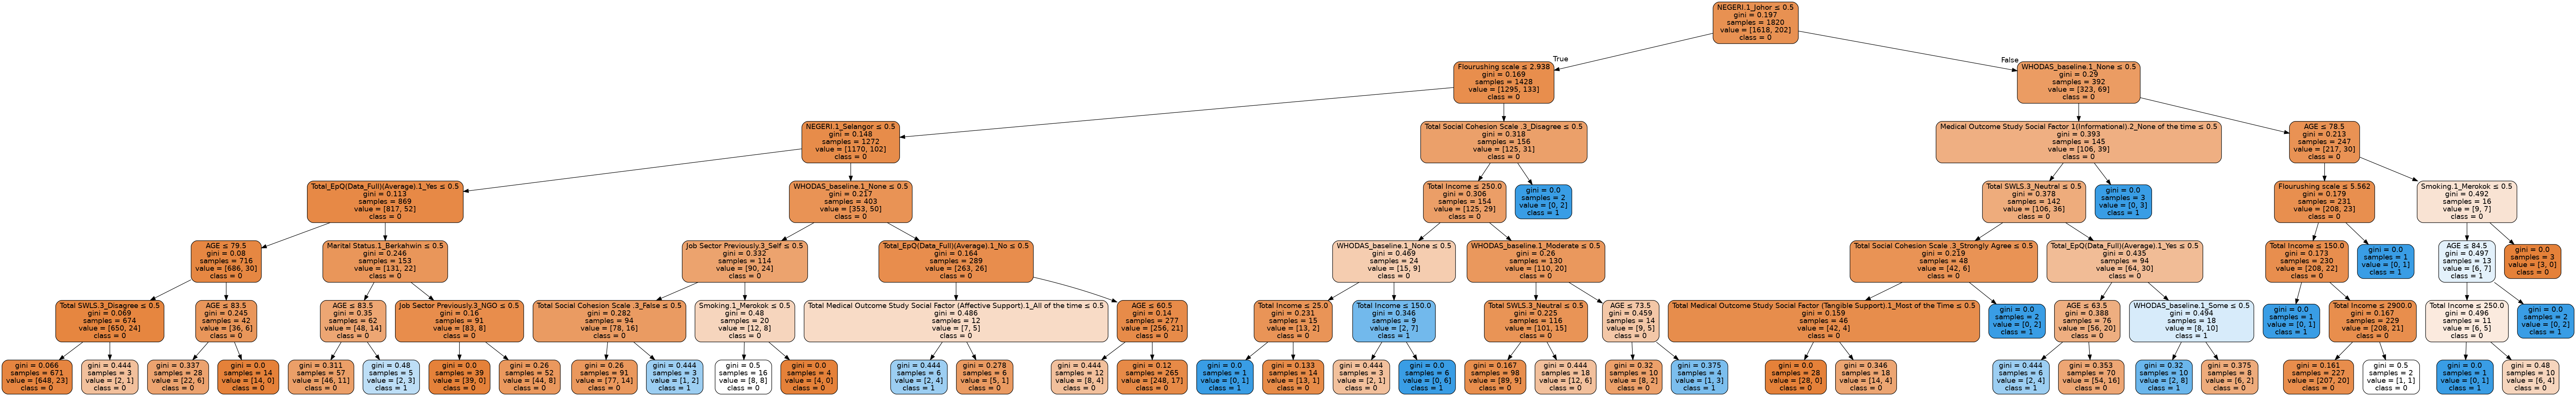

In [16]:
#change the clf based on the variable calculated earlier, and the respective feature list

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = pd.concat([final_demographic,final_health,final_social,final_psychology]).columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('GDS.png')
Image(graph.create_png())

## MLP classifier

In [17]:
#MLP Classifier
def partition_MLP(portion,features,target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=portion, random_state=1)
    clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
    y_pred = clf.predict(X_test)    
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_pred, y_test)
    print("Accuracy of MLPClassifier :", accuracy(cm))
    return accuracy(cm)
def accuracy(confusion_matrix):
        diagonal_sum = confusion_matrix.trace()
        sum_of_all_elements = confusion_matrix.sum()
        return diagonal_sum / sum_of_all_elements
    
print("\nMeasuring prediction on MMSE")
MMSE_results["Mlp"]=[
    partition_MLP(0.2,final_demographic,MMSE)
    ,partition_MLP(0.2,final_health,MMSE)
    ,partition_MLP(0.2,final_social,MMSE)
    ,partition_MLP(0.2,final_psychology,MMSE)
    ,partition_MLP(0.2,pd.concat([final_demographic,final_health],axis=1),MMSE)
    ,partition_MLP(0.2,pd.concat([final_demographic,final_social],axis=1),MMSE)
    ,partition_MLP(0.2,pd.concat([final_social,final_health],axis=1),MMSE)
    ,partition_MLP(0.2,pd.concat([final_social,final_psychology],axis=1),MMSE)
    ,partition_MLP(0.2,pd.concat([final_health,final_psychology],axis=1),MMSE)
    ,partition_MLP(0.2,pd.concat([final_demographic,final_psychology],axis=1),MMSE)
    ,partition_MLP(0.2,pd.concat([final_demographic,final_health,final_social],axis=1),MMSE)
    ,partition_MLP(0.2,pd.concat([final_demographic,final_health,final_social,final_psychology],axis=1),MMSE)
]
print("\nMeasuring prediction on GDS")
GDS_results["Mlp"]=[    
     partition_MLP(0.2,final_demographic,GDS)
    ,partition_MLP(0.2,final_health,GDS)
    ,partition_MLP(0.2,final_social,GDS)
    ,partition_MLP(0.2,final_psychology,GDS)
    ,partition_MLP(0.2,pd.concat([final_demographic,final_health],axis=1),GDS)
    ,partition_MLP(0.2,pd.concat([final_demographic,final_social],axis=1),GDS)
    ,partition_MLP(0.2,pd.concat([final_social,final_health],axis=1),GDS)
    ,partition_MLP(0.2,pd.concat([final_social,final_psychology],axis=1),GDS)
    ,partition_MLP(0.2,pd.concat([final_health,final_psychology],axis=1),GDS)
    ,partition_MLP(0.2,pd.concat([final_demographic,final_psychology],axis=1),GDS)
    ,partition_MLP(0.2,pd.concat([final_demographic,final_health,final_social],axis=1),GDS)
    ,partition_MLP(0.2,pd.concat([final_demographic,final_health,final_psychology],axis=1),GDS)
    ,partition_MLP(0.2,pd.concat([final_demographic,final_psychology,final_social],axis=1),GDS)
    ,partition_MLP(0.2,pd.concat([final_psychology,final_health,final_social],axis=1),GDS)
    ,partition_MLP(0.2,pd.concat([final_demographic,final_health,final_social,final_psychology],axis=1),GDS)
]


Measuring prediction on MMSE
Accuracy of MLPClassifier : 0.668859649122807
Accuracy of MLPClassifier : 0.6381578947368421
Accuracy of MLPClassifier : 0.6271929824561403
Accuracy of MLPClassifier : 0.6403508771929824
Accuracy of MLPClassifier : 0.6754385964912281
Accuracy of MLPClassifier : 0.6622807017543859
Accuracy of MLPClassifier : 0.6337719298245614
Accuracy of MLPClassifier : 0.6403508771929824
Accuracy of MLPClassifier : 0.6293859649122807
Accuracy of MLPClassifier : 0.6096491228070176
Accuracy of MLPClassifier : 0.6447368421052632
Accuracy of MLPClassifier : 0.6513157894736842

Measuring prediction on GDS
Accuracy of MLPClassifier : 0.918859649122807
Accuracy of MLPClassifier : 0.918859649122807
Accuracy of MLPClassifier : 0.918859649122807
Accuracy of MLPClassifier : 0.918859649122807
Accuracy of MLPClassifier : 0.918859649122807
Accuracy of MLPClassifier : 0.9100877192982456
Accuracy of MLPClassifier : 0.918859649122807
Accuracy of MLPClassifier : 0.9166666666666666
Accuracy

In [18]:
#KNN Classifier
def partition_KNN(portion,features,target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=portion, random_state=1)
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy of KNNClassifier :", accuracies.mean()*100)
    return accuracy(cm)
    
print("\nMeasuring prediction on MMSE")
MMSE_results["Knn"]=[
    partition_KNN(0.2,final_demographic,MMSE)
    ,partition_KNN(0.2,final_health,MMSE)
    ,partition_KNN(0.2,final_social,MMSE)
    ,partition_KNN(0.2,final_psychology,MMSE)
    ,partition_KNN(0.2,pd.concat([final_demographic,final_health],axis=1),MMSE)
    ,partition_KNN(0.2,pd.concat([final_demographic,final_social],axis=1),MMSE)
    ,partition_KNN(0.2,pd.concat([final_social,final_health],axis=1),MMSE)
    ,partition_KNN(0.2,pd.concat([final_social,final_psychology],axis=1),MMSE)
    ,partition_KNN(0.2,pd.concat([final_health,final_psychology],axis=1),MMSE)
    ,partition_KNN(0.2,pd.concat([final_demographic,final_psychology],axis=1),MMSE)
    ,partition_KNN(0.2,pd.concat([final_demographic,final_health,final_social],axis=1),MMSE)
    ,partition_KNN(0.2,pd.concat([final_demographic,final_health,final_social,final_psychology],axis=1),MMSE)
]
print("\nMeasuring prediction on GDS")
GDS_results["Knn"]=[    
     partition_KNN(0.2,final_demographic,GDS)
    ,partition_KNN(0.2,final_health,GDS)
    ,partition_KNN(0.2,final_social,GDS)
    ,partition_KNN(0.2,final_psychology,GDS)
    ,partition_KNN(0.2,pd.concat([final_demographic,final_health],axis=1),GDS)
    ,partition_KNN(0.2,pd.concat([final_demographic,final_social],axis=1),GDS)
    ,partition_KNN(0.2,pd.concat([final_social,final_health],axis=1),GDS)
    ,partition_KNN(0.2,pd.concat([final_social,final_psychology],axis=1),GDS)
    ,partition_KNN(0.2,pd.concat([final_health,final_psychology],axis=1),GDS)
    ,partition_KNN(0.2,pd.concat([final_demographic,final_psychology],axis=1),GDS)
    ,partition_KNN(0.2,pd.concat([final_demographic,final_health,final_social],axis=1),GDS)
    ,partition_KNN(0.2,pd.concat([final_demographic,final_health,final_psychology],axis=1),GDS)
    ,partition_KNN(0.2,pd.concat([final_demographic,final_psychology,final_social],axis=1),GDS)
    ,partition_KNN(0.2,pd.concat([final_psychology,final_health,final_social],axis=1),GDS)
    ,partition_KNN(0.2,pd.concat([final_demographic,final_health,final_social,final_psychology],axis=1),GDS)
]



Measuring prediction on MMSE
Accuracy of KNNClassifier : 63.846153846153854
Accuracy of KNNClassifier : 36.97802197802198
Accuracy of KNNClassifier : 58.791208791208796
Accuracy of KNNClassifier : 58.131868131868124
Accuracy of KNNClassifier : 64.83516483516485
Accuracy of KNNClassifier : 62.85714285714285
Accuracy of KNNClassifier : 55.98901098901099
Accuracy of KNNClassifier : 58.51648351648351
Accuracy of KNNClassifier : 57.25274725274725
Accuracy of KNNClassifier : 65.27472527472528
Accuracy of KNNClassifier : 61.92307692307693
Accuracy of KNNClassifier : 62.14285714285713

Measuring prediction on GDS
Accuracy of KNNClassifier : 87.41758241758242
Accuracy of KNNClassifier : 88.9010989010989
Accuracy of KNNClassifier : 87.91208791208793
Accuracy of KNNClassifier : 88.1868131868132
Accuracy of KNNClassifier : 88.07692307692307
Accuracy of KNNClassifier : 87.91208791208793
Accuracy of KNNClassifier : 88.07692307692308
Accuracy of KNNClassifier : 88.68131868131869
Accuracy of KNNClass

In [19]:
def partition_SVC(portion,features,target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=portion, random_state=1)#Create the SVM model
    classifier = SVC(kernel = 'sigmoid')
    #Fit the model for the data
    classifier.fit(X_train, y_train)
    #Make the prediction
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print("Accuracy of SVCClassifier :", accuracy(cm))
    return accuracy(cm)

print("\nMeasuring prediction on MMSE")
MMSE_results["Svc"]=[
    partition_SVC(0.2,final_demographic,MMSE)
    ,partition_SVC(0.2,final_health,MMSE)
    ,partition_SVC(0.2,final_social,MMSE)
    ,partition_SVC(0.2,final_psychology,MMSE)
    ,partition_SVC(0.2,pd.concat([final_demographic,final_health],axis=1),MMSE)
    ,partition_SVC(0.2,pd.concat([final_demographic,final_social],axis=1),MMSE)
    ,partition_SVC(0.2,pd.concat([final_social,final_health],axis=1),MMSE)
    ,partition_SVC(0.2,pd.concat([final_social,final_psychology],axis=1),MMSE)
    ,partition_SVC(0.2,pd.concat([final_health,final_psychology],axis=1),MMSE)
    ,partition_SVC(0.2,pd.concat([final_demographic,final_psychology],axis=1),MMSE)
    ,partition_SVC(0.2,pd.concat([final_demographic,final_health,final_social],axis=1),MMSE)
    ,partition_SVC(0.2,pd.concat([final_demographic,final_health,final_social,final_psychology],axis=1),MMSE)
]
print("\nMeasuring prediction on GDS")
GDS_results["Svc"]=[    
     partition_SVC(0.2,final_demographic,GDS)
    ,partition_SVC(0.2,final_health,GDS)
    ,partition_SVC(0.2,final_social,GDS)
    ,partition_SVC(0.2,final_psychology,GDS)
    ,partition_SVC(0.2,pd.concat([final_demographic,final_health],axis=1),GDS)
    ,partition_SVC(0.2,pd.concat([final_demographic,final_social],axis=1),GDS)
    ,partition_SVC(0.2,pd.concat([final_social,final_health],axis=1),GDS)
    ,partition_SVC(0.2,pd.concat([final_social,final_psychology],axis=1),GDS)
    ,partition_SVC(0.2,pd.concat([final_health,final_psychology],axis=1),GDS)
    ,partition_SVC(0.2,pd.concat([final_demographic,final_psychology],axis=1),GDS)
    ,partition_SVC(0.2,pd.concat([final_demographic,final_health,final_social],axis=1),GDS)
    ,partition_SVC(0.2,pd.concat([final_demographic,final_health,final_psychology],axis=1),GDS)
    ,partition_SVC(0.2,pd.concat([final_demographic,final_psychology,final_social],axis=1),GDS)
    ,partition_SVC(0.2,pd.concat([final_psychology,final_health,final_social],axis=1),GDS)
    ,partition_SVC(0.2,pd.concat([final_demographic,final_health,final_social,final_psychology],axis=1),GDS)
]




Measuring prediction on MMSE
Accuracy of SVCClassifier : 0.6557017543859649
Accuracy of SVCClassifier : 0.6271929824561403
Accuracy of SVCClassifier : 0.543859649122807
Accuracy of SVCClassifier : 0.6052631578947368
Accuracy of SVCClassifier : 0.6513157894736842
Accuracy of SVCClassifier : 0.543859649122807
Accuracy of SVCClassifier : 0.543859649122807
Accuracy of SVCClassifier : 0.543859649122807
Accuracy of SVCClassifier : 0.6008771929824561
Accuracy of SVCClassifier : 0.6513157894736842
Accuracy of SVCClassifier : 0.543859649122807
Accuracy of SVCClassifier : 0.543859649122807

Measuring prediction on GDS
Accuracy of SVCClassifier : 0.9035087719298246
Accuracy of SVCClassifier : 0.918859649122807
Accuracy of SVCClassifier : 0.918859649122807
Accuracy of SVCClassifier : 0.918859649122807
Accuracy of SVCClassifier : 0.9035087719298246
Accuracy of SVCClassifier : 0.918859649122807
Accuracy of SVCClassifier : 0.918859649122807
Accuracy of SVCClassifier : 0.918859649122807
Accuracy of S

Neural network deep learning POG

In [20]:
def partition_NN(portion,features,target):
    model = keras.Sequential([
        # the hidden ReLU layers
        layers.Dense(units=4, activation='relu', input_shape=[2]),
        layers.Dense(units=3, activation='relu'),
        # the linear output layer 
        layers.Dense(units=1),
    ])
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=portion, random_state=1)
    def build_classifier():
        classifier = Sequential() # initialize neural network
        classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
        classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
        classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
        classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
        return classifier
    classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 3)
    mean = accuracies.mean()
    print("Accuracy mean: "+ str(mean))

print("\nMeasuring prediction on MMSE")
MMSE_results["Nn"]=[
    partition_NN(0.2,final_demographic,MMSE)
    ,partition_NN(0.2,final_health,MMSE)
    ,partition_NN(0.2,final_social,MMSE)
    ,partition_NN(0.2,final_psychology,MMSE)
    ,partition_NN(0.2,pd.concat([final_demographic,final_health],axis=1),MMSE)
    ,partition_NN(0.2,pd.concat([final_demographic,final_social],axis=1),MMSE)
    ,partition_NN(0.2,pd.concat([final_social,final_health],axis=1),MMSE)
    ,partition_NN(0.2,pd.concat([final_social,final_psychology],axis=1),MMSE)
    ,partition_NN(0.2,pd.concat([final_health,final_psychology],axis=1),MMSE)
    ,partition_NN(0.2,pd.concat([final_demographic,final_psychology],axis=1),MMSE)
    ,partition_NN(0.2,pd.concat([final_demographic,final_health,final_social],axis=1),MMSE)
    ,partition_NN(0.2,pd.concat([final_demographic,final_health,final_social,final_psychology],axis=1),MMSE)
]
print("\nMeasuring prediction on GDS")
GDS_results["Nn"]=[    
     partition_NN(0.2,final_demographic,GDS)
    ,partition_NN(0.2,final_health,GDS)
    ,partition_NN(0.2,final_social,GDS)
    ,partition_NN(0.2,final_psychology,GDS)
    ,partition_NN(0.2,pd.concat([final_demographic,final_health],axis=1),GDS)
    ,partition_NN(0.2,pd.concat([final_demographic,final_social],axis=1),GDS)
    ,partition_NN(0.2,pd.concat([final_social,final_health],axis=1),GDS)
    ,partition_NN(0.2,pd.concat([final_social,final_psychology],axis=1),GDS)
    ,partition_NN(0.2,pd.concat([final_health,final_psychology],axis=1),GDS)
    ,partition_NN(0.2,pd.concat([final_demographic,final_psychology],axis=1),GDS)
    ,partition_NN(0.2,pd.concat([final_demographic,final_health,final_social],axis=1),GDS)
    ,partition_NN(0.2,pd.concat([final_demographic,final_health,final_psychology],axis=1),GDS)
    ,partition_NN(0.2,pd.concat([final_demographic,final_psychology,final_social],axis=1),GDS)
    ,partition_NN(0.2,pd.concat([final_psychology,final_health,final_social],axis=1),GDS)
    ,partition_NN(0.2,pd.concat([final_demographic,final_health,final_social,final_psychology],axis=1),GDS)
]



Measuring prediction on MMSE


2022-07-01 13:34:48.707596: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-01 13:34:48.708530: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-01 13:34:48.708671: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-07-01 13:34:48.708772: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-07-01 13:34:48.708863: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Epoch 1/100
38/38 [==============================] - 3s 3ms/step - loss: 0.6878 - accuracy: 0.5870
Epoch 2/100
38/38 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.6364
Epoch 3/100
38/38 [==============================] - 0s 3ms/step - loss: 0.6655 - accuracy: 0.6364
Epoch 4/100
38/38 [==============================] - 0s 3ms/step - loss: 0.6553 - accuracy: 0.6364
Epoch 5/100
38/38 [==============================] - 0s 3ms/step - loss: 0.6455 - accuracy: 0.6364
Epoch 6/100
38/38 [==============================] - 0s 4ms/step - loss: 0.6363 - accuracy: 0.6364
Epoch 7/100
38/38 [==============================] - 0s 4ms/step - loss: 0.6274 - accuracy: 0.6364
Epoch 8/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6191 - accuracy: 0.6364
Epoch 9/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6111 - accuracy: 0.6364
Epoch 10/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6035 - accuracy: 0.6364
Epoch 11/

### Naives Bayes 
https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python/notebook

In [ ]:

def partition_NB(portion, feature, target):
    df = feature
    numerical = [var for var in df.columns if df[var].dtype!='O']
    # find categorical variables
    categorical = [var for var in df.columns if df[var].dtype=='O']
    X_train, X_test, y_train, y_test = train_test_split(df, target, test_size= portion, random_state=0)
    encoder = ce.OneHotEncoder(cols=categorical)
    X_train = encoder.fit_transform(X_train)
    X_test = encoder.transform(X_test)
    cols = X_train.columns
    from sklearn.preprocessing import RobustScaler
    scaler = RobustScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_train = pd.DataFrame(X_train, columns=[cols])
    X_test = pd.DataFrame(X_test, columns=[cols])
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    from sklearn.metrics import accuracy_score
    print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
    return accuracy_score(y_test, y_pred)
print("\nMeasuring prediction on MMSE")
MMSE_results["Nb"]=[
    partition_NB(0.2,final_demographic,MMSE)
    ,partition_NB(0.2,final_health,MMSE)
    ,partition_NB(0.2,final_social,MMSE)
    ,partition_NB(0.2,final_psychology,MMSE)
    ,partition_NB(0.2,pd.concat([final_demographic,final_health],axis=1),MMSE)
    ,partition_NB(0.2,pd.concat([final_demographic,final_social],axis=1),MMSE)
    ,partition_NB(0.2,pd.concat([final_social,final_health],axis=1),MMSE)
    ,partition_NB(0.2,pd.concat([final_social,final_psychology],axis=1),MMSE)
    ,partition_NB(0.2,pd.concat([final_health,final_psychology],axis=1),MMSE)
    ,partition_NB(0.2,pd.concat([final_demographic,final_psychology],axis=1),MMSE)
    ,partition_NB(0.2,pd.concat([final_demographic,final_health,final_social],axis=1),MMSE)
    ,partition_NB(0.2,pd.concat([final_demographic,final_health,final_social,final_psychology],axis=1),MMSE)
]
print("\nMeasuring prediction on GDS")
GDS_results["Nb"]=[    
     partition_NB(0.2,final_demographic,GDS)
    ,partition_NB(0.2,final_health,GDS)
    ,partition_NB(0.2,final_social,GDS)
    ,partition_NB(0.2,final_psychology,GDS)
    ,partition_NB(0.2,pd.concat([final_demographic,final_health],axis=1),GDS)
    ,partition_NB(0.2,pd.concat([final_demographic,final_social],axis=1),GDS)
    ,partition_NB(0.2,pd.concat([final_social,final_health],axis=1),GDS)
    ,partition_NB(0.2,pd.concat([final_social,final_psychology],axis=1),GDS)
    ,partition_NB(0.2,pd.concat([final_health,final_psychology],axis=1),GDS)
    ,partition_NB(0.2,pd.concat([final_demographic,final_psychology],axis=1),GDS)
    ,partition_NB(0.2,pd.concat([final_demographic,final_health,final_social],axis=1),GDS)
    ,partition_NB(0.2,pd.concat([final_demographic,final_health,final_psychology],axis=1),GDS)
    ,partition_NB(0.2,pd.concat([final_demographic,final_psychology,final_social],axis=1),GDS)
    ,partition_NB(0.2,pd.concat([final_psychology,final_health,final_social],axis=1),GDS)
    ,partition_NB(0.2,pd.concat([final_demographic,final_health,final_social,final_psychology],axis=1),GDS)
]